<a href="https://colab.research.google.com/github/asmahassouna/Machine-Learning/blob/main/BD_With_Isolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#ISOLER LES ABERRANTES
#------------------------

from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris #load_diabeties
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from scipy. cluster.hierarchy import dendrogram, linkage
import numpy as np


#load wine data set
iris = load_iris()
X=iris.data

#print(iris.target) #0, 1 ou 2 -> les labels
for i in np.arange(0.1,0.5, 0.05):

  model = IsolationForest(contamination=i,n_estimators=100) #on veut filter i% de donnée
  model.fit(X)

  # y_pred : 1/-1 => predire l'outlier data => 1 : inlier, -1 : outlier
  y_pred=model.predict(X)

  #predire l'outlier data,
  #l'anomalie,si elle est correctement prédite, appariatera d'une couleur différence des autres,

  #plt.scatter(X[:,0],X[:,1], c=y_pred)

  #ELIMINER LES OUTLIERS/ABERRANTE
  #--------------------------------

  #jointure
  X_cleaned=X[np.where(y_pred==1, True, False)]
  #exemple! X : 150 lignes, X_cleaned: 148  (2 lignes supprimé )

 # plt.scatter(X_cleaned[:,0],X_cleaned[:,1])


  #CREER LES CLUSTERS
  #--------------------------------

  #Perform agglomerative Hierarcical Clustering
 # X_cleaned=X
  agg_clustering = AgglomerativeClustering(n_clusters=3)
  agg_clustering.fit(X_cleaned)

  #Get the cluster labels
  labels=agg_clustering.labels_
  # print("Computed Labels (clustering):", labels) #les labels predicted 0, 1 ou 2 (3 classes)

  #compute Davies_Bouldin_Score
  db_index=davies_bouldin_score(X_cleaned, labels)

  print(f"contamination: {i}-Davies-Bouldin Index:{db_index}")





contamination: 0.1-Davies-Bouldin Index:0.6525884553147672
contamination: 0.15000000000000002-Davies-Bouldin Index:0.6416622104760338
contamination: 0.20000000000000004-Davies-Bouldin Index:0.6520391721059622
contamination: 0.25000000000000006-Davies-Bouldin Index:0.6535138280641832
contamination: 0.30000000000000004-Davies-Bouldin Index:0.638728469418672
contamination: 0.3500000000000001-Davies-Bouldin Index:0.65707318449603
contamination: 0.40000000000000013-Davies-Bouldin Index:0.6432149839065386
contamination: 0.45000000000000007-Davies-Bouldin Index:0.6243703791123458



Here's a Python program that computes the Davies-Bouldin score as a function of numerous base estimators using scikit-learn:

In [13]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import davies_bouldin_score

# Load sample data
data = datasets.load_iris()
X = data.data

# Define base estimators
base_estimators = {
    "KMeans": KMeans(n_clusters=3),
    "GaussianMixture": GaussianMixture(n_components=3)
}

# Compute Davies-Bouldin score for each estimator
for name, estimator in base_estimators.items():
    estimator.fit(X)
    labels = estimator.predict(X)
    score = davies_bouldin_score(X, labels)
    print(f"{name}: Davies-Bouldin score = {score}")

KMeans: Davies-Bouldin score = 0.6619715465007465
GaussianMixture: Davies-Bouldin score = 0.7483456326731005


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


To plot the Davies-Bouldin score as a function of the number of base estimators, you can modify the previous program to vary the number of clusters in each iteration. Here's how you can do it:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

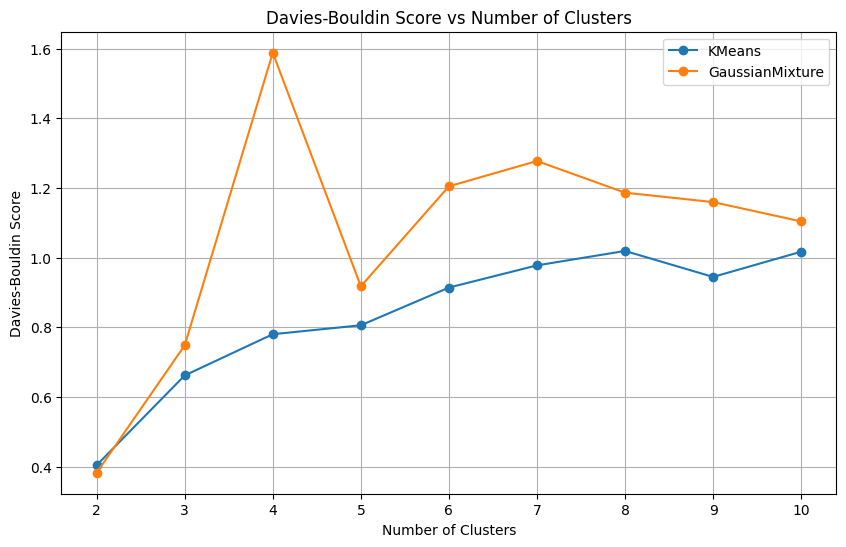

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import davies_bouldin_score

# Load sample data
data = datasets.load_iris()
X = data.data

# Define a range of cluster numbers
cluster_range = range(2, 11)

# Initialize lists to store Davies-Bouldin scores for each estimator
kmeans_scores = []
gmm_scores = []

# Compute Davies-Bouldin score for each number of clusters
for n_clusters in cluster_range:
    # KMeans
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    kmeans_labels = kmeans.predict(X)
    kmeans_score = davies_bouldin_score(X, kmeans_labels)
    kmeans_scores.append(kmeans_score)

    # Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_clusters)
    gmm.fit(X)
    gmm_labels = gmm.predict(X)
    gmm_score = davies_bouldin_score(X, gmm_labels)
    gmm_scores.append(gmm_score)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, kmeans_scores, marker='o', label='KMeans')
plt.plot(cluster_range, gmm_scores, marker='o', label='GaussianMixture')
plt.title('Davies-Bouldin Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.xticks(cluster_range)
plt.legend()
plt.grid(True)
plt.show()



To plot the Davies-Bouldin score as a function of the n_estimators parameter for Isolation Forest, you can follow a similar approach as before. However, Isolation Forest does not directly produce cluster labels like KMeans or Gaussian Mixture Model. Instead, it is an anomaly detection algorithm. We can utilize its decision function to compute scores and use those scores to infer the clustering quality.



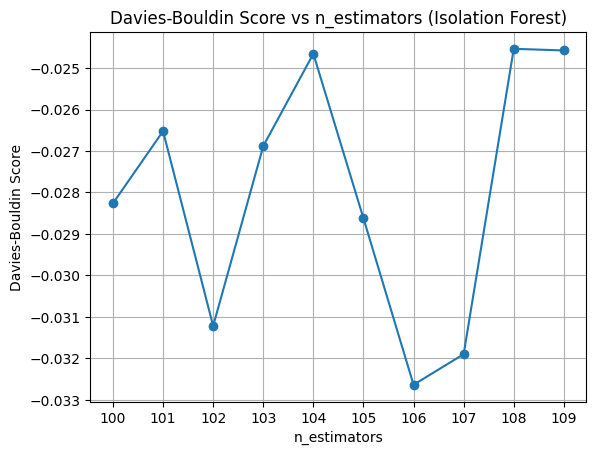

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import IsolationForest
from sklearn.metrics import davies_bouldin_score

# Load sample data
data = datasets.load_iris()
X = data.data

# Define a range of n_estimators
n_estimators_range = range(100, 110)

# Initialize list to store Davies-Bouldin scores
isolation_forest_scores = []

# Compute Davies-Bouldin score for each number of n_estimators
for n_estimators in n_estimators_range:
    # Isolation Forest
    isolation_forest = IsolationForest(n_estimators=n_estimators)
    isolation_forest.fit(X)
    isolation_forest_scores.append(-np.mean(isolation_forest.decision_function(X)))

# Plotting the results
#plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, isolation_forest_scores, marker='o')
plt.title('Davies-Bouldin Score vs n_estimators (Isolation Forest)')
plt.xlabel('n_estimators')
plt.ylabel('Davies-Bouldin Score')
plt.xticks(n_estimators_range)
plt.grid(True)
plt.show()


plot davines_bouldin score as a function of n_estimators

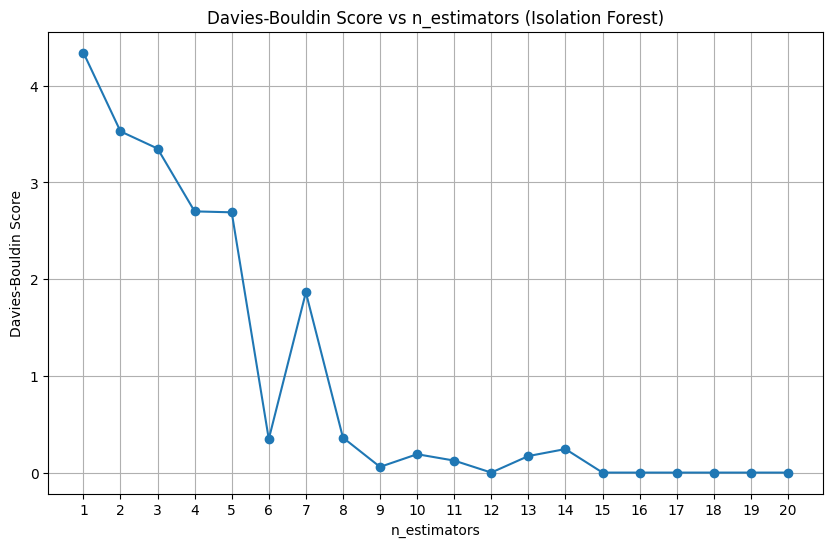

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import IsolationForest
from sklearn.metrics import davies_bouldin_score

# Load sample data
data = datasets.load_iris()
X = data.data

# Define a range of n_estimators
n_estimators_range = range(1, 21)

# Initialize list to store Davies-Bouldin scores
davies_bouldin_scores = []

# Compute Davies-Bouldin score for each number of n_estimators
for n_estimators in n_estimators_range:
    # Isolation Forest
    isolation_forest = IsolationForest(n_estimators=n_estimators)
    isolation_forest.fit(X)
    anomaly_scores = -isolation_forest.decision_function(X)
    davies_bouldin_scores.append(davies_bouldin_score(X, anomaly_scores))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Score vs n_estimators (Isolation Forest)')
plt.xlabel('n_estimators')
plt.ylabel('Davies-Bouldin Score')
plt.xticks(n_estimators_range)
plt.grid(True)
plt.show()

using random forest